In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('train_sales.csv')

In [3]:
sales.shape

(8523, 12)

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
sales.describe([0.25,0.50,0.75,0.99])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
99%,20.850000,0.226249,263.022600,2009.000000,7366.011720
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
round(100*(sales.isnull().sum()/len(sales.index)),2)

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

In [7]:
sales.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [8]:
sales.loc[sales.Outlet_Size.isnull(),'Outlet_Size']='Medium'

C:\Users\sumasark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


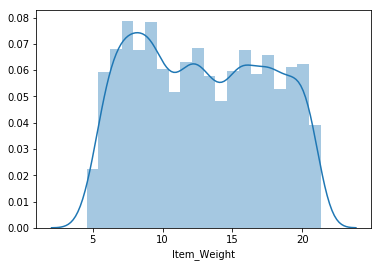

In [9]:
# Checking the distribution for the Item_Weight
sns.distplot(sales[~sales['Item_Weight'].isnull()]['Item_Weight'])

In [10]:
# As this is not a normal distribution imputing the median value
sales.loc[sales.Item_Weight.isnull(),'Item_Weight']=sales.Item_Weight.median()

In [11]:
round(100*(sales.isnull().sum()/len(sales)),2)

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [12]:
sales.describe([0.25,0.50,0.75,0.9])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
90%,19.10000,0.139514,231.200480,2009.000000,4570.051200
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


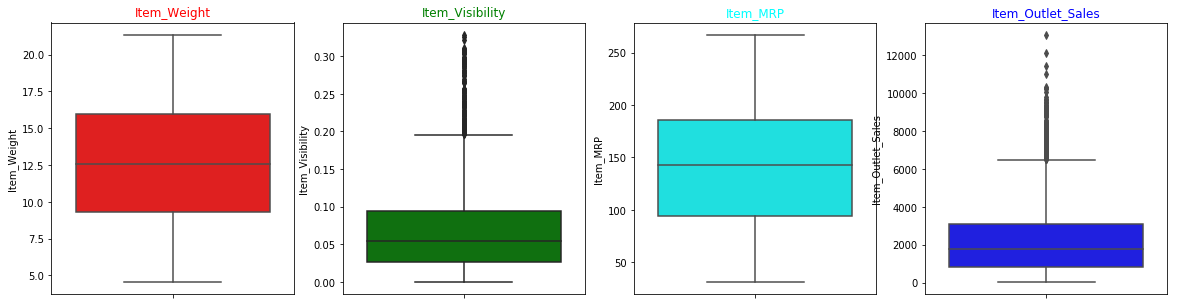

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title('Item_Weight',color='red')
sns.boxplot(y = sales.Item_Weight,color='red')

plt.subplot(1,4,2)
plt.title('Item_Visibility',color='green')
sns.boxplot(y = sales.Item_Visibility,color='green')

plt.subplot(1,4,3)
plt.title('Item_MRP',color='cyan')
sns.boxplot(y = sales.Item_MRP,color='cyan')

plt.subplot(1,4,4)
plt.title('Item_Outlet_Sales',color='blue')
sns.boxplot(y = sales.Item_Outlet_Sales,color='blue')
plt.show()

In [14]:
s_Q1 = sales.Item_Outlet_Sales.quantile(0.25)
s_Q3 = sales.Item_Outlet_Sales.quantile(0.75)

sal_q_dif = s_Q3-s_Q1
sales = sales[(sales.Item_Outlet_Sales >=s_Q1-1.5*sal_q_dif) & (sales.Item_Outlet_Sales <=s_Q3+1.5*sal_q_dif)]

it_Q1 = sales.Item_Visibility.quantile(0.25)
it_Q3 = sales.Item_Visibility.quantile(0.75)

it_q_dif = it_Q3-it_Q1
sales = sales[(sales.Item_Visibility>=it_Q1-1.5*it_q_dif) & (sales.Item_Visibility<=it_Q3+1.5*it_q_dif)]

In [15]:
sales.shape

(8196, 12)

In [16]:
sales[list(sales.dtypes[sales.dtypes=='object'].index)].sample(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1034,FDL52,reg,Frozen Foods,OUT010,Medium,Tier 3,Grocery Store
3753,FDZ14,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3
3169,FDB29,Regular,Frozen Foods,OUT018,Medium,Tier 3,Supermarket Type2
6916,NCO17,Low Fat,Health and Hygiene,OUT049,Medium,Tier 1,Supermarket Type1
6127,FDA10,Low Fat,Snack Foods,OUT017,Medium,Tier 2,Supermarket Type1


In [17]:
# Dropping the Item_Identifier
sales = sales.drop('Item_Identifier',axis='columns')

In [18]:
ohe_col = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
ohe_dummy = pd.get_dummies(sales[ohe_col],drop_first=True)

In [19]:
sales_with_dummy = pd.concat([sales,ohe_dummy],axis='columns')

In [20]:
sales_with_dummy = sales_with_dummy.drop(ohe_col,axis='columns')

In [21]:
sales_with_dummy.sample(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
511,9.800,0.026895,128.4020,2002,2403.5380,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
7272,12.850,0.137441,157.6630,1999,2659.8710,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
6793,9.395,0.099102,105.8280,2004,1704.4480,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
5296,12.600,0.027645,149.4708,1985,3159.8868,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4810,19.350,0.016645,120.9098,2002,1687.1372,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


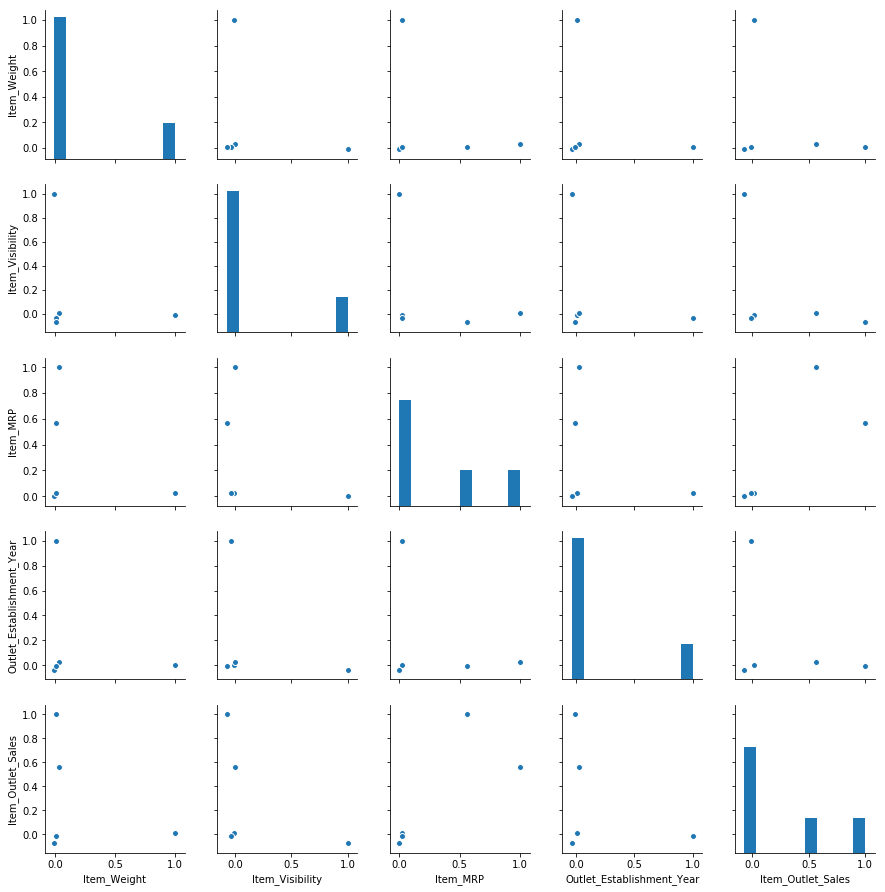

In [22]:
sns.pairplot(sales.corr())
plt.show()

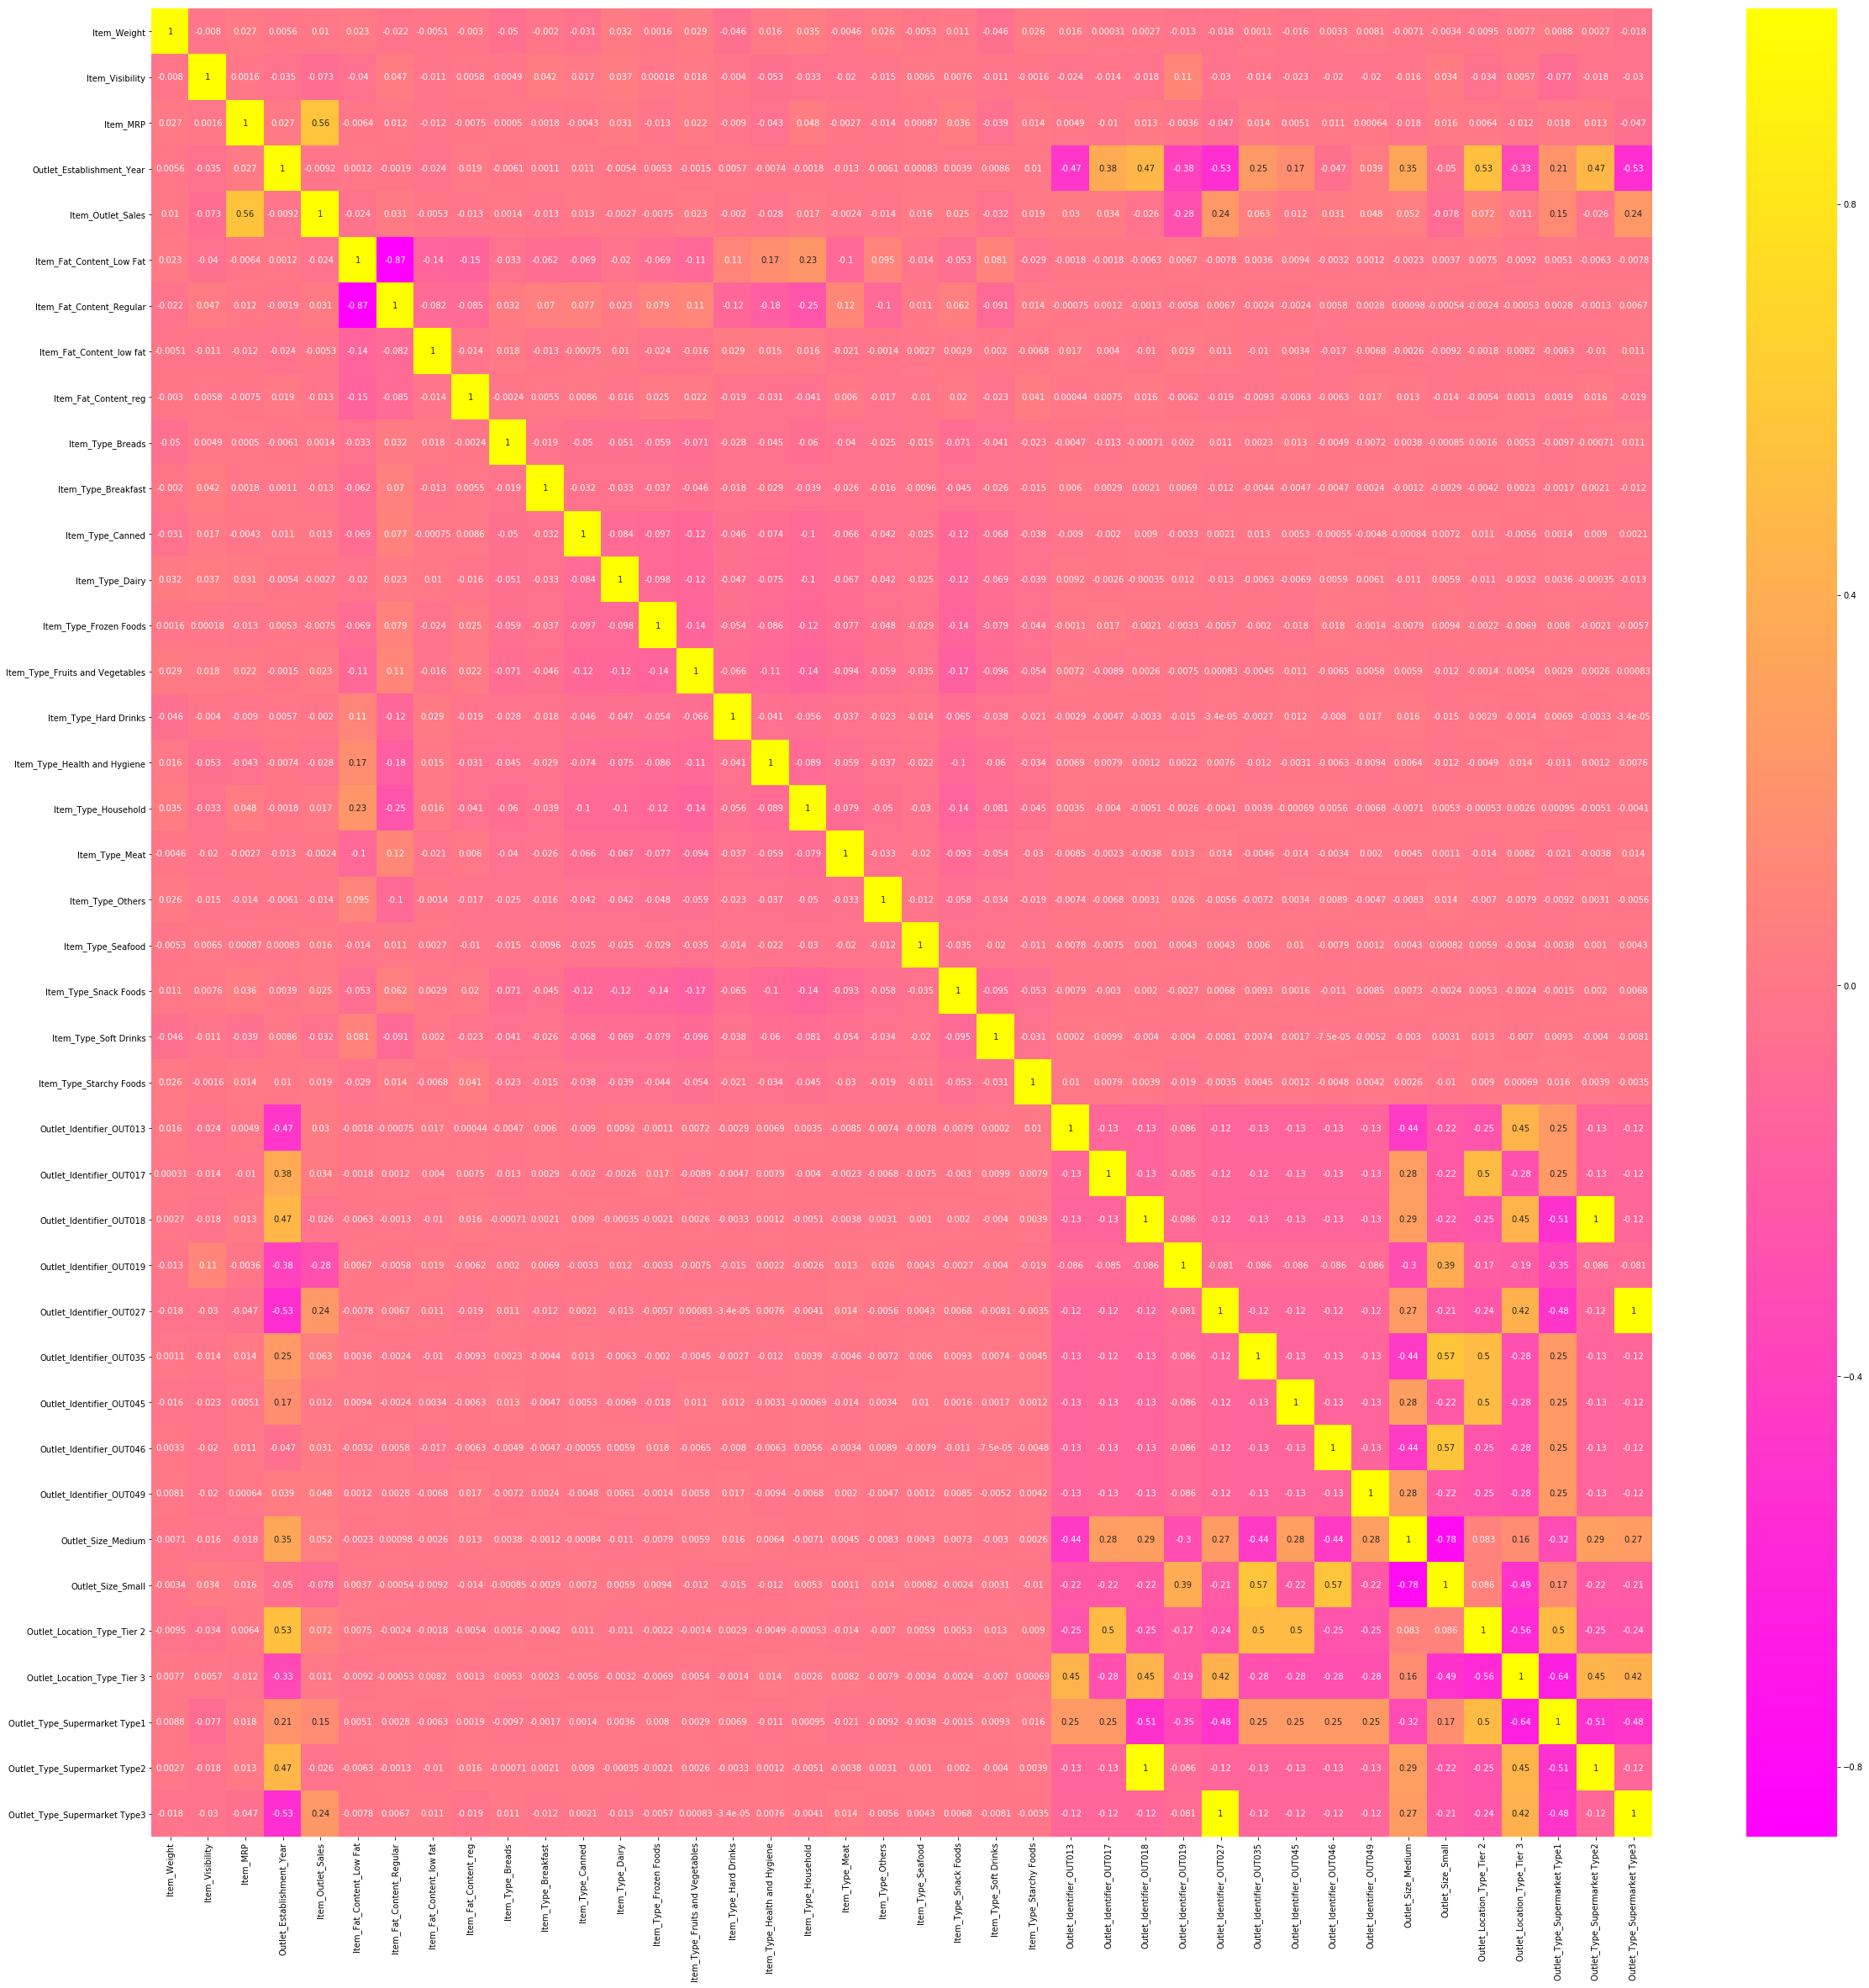

In [23]:
plt.figure(figsize=(40,40))
sns.heatmap(sales_with_dummy.corr(),cmap='spring',annot=True)
plt.show()

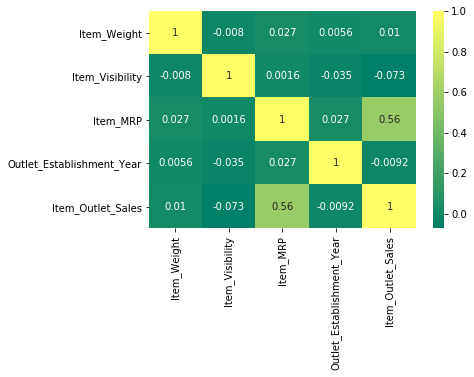

In [24]:
sns.heatmap(sales.corr(),annot=True,cmap='summer')

In [25]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [26]:
scale_col = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
sales_with_dummy[scale_col] = scale.fit_transform(sales_with_dummy[scale_col])

C:\Users\sumasark\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [27]:
sales_with_dummy.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,...,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000
mean,0.492375,0.321723,0.457630,0.545271,2088.912082,0.597853,0.337970,0.013055,0.014031,0.029527,...,0.112250,0.112250,0.112128,0.609078,0.279039,0.334431,0.385920,0.670693,0.112860,0.101513
std,0.254127,0.235668,0.261159,0.345331,1501.583374,0.490361,0.473047,0.113518,0.117627,0.169288,...,0.315693,0.315693,0.315543,0.487987,0.448554,0.471820,0.486842,0.469990,0.316441,0.302025
min,0.000000,0.000000,0.000000,0.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.282525,0.136369,0.262047,0.083333,856.884600,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.479012,0.268204,0.466222,0.583333,1780.349200,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.687407,0.472081,0.646751,0.791667,3020.068800,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,6478.234000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
train_y = sales_with_dummy.pop('Item_Outlet_Sales')
train_X = sales_with_dummy

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [30]:
lm = LinearRegression()
lm.fit(train_X,train_y)

rfe = RFE(lm,15)
rfe = rfe.fit(train_X,train_y)

In [31]:
list(zip(train_X.columns,rfe.support_,rfe.ranking_))

[('Item_Weight', False, 23),
 ('Item_Visibility', False, 13),
 ('Item_MRP', False, 3),
 ('Outlet_Establishment_Year', True, 1),
 ('Item_Fat_Content_Low Fat', False, 21),
 ('Item_Fat_Content_Regular', False, 7),
 ('Item_Fat_Content_low fat', False, 9),
 ('Item_Fat_Content_reg', False, 12),
 ('Item_Type_Breads', False, 22),
 ('Item_Type_Breakfast', False, 5),
 ('Item_Type_Canned', False, 11),
 ('Item_Type_Dairy', False, 6),
 ('Item_Type_Frozen Foods', False, 15),
 ('Item_Type_Fruits and Vegetables', False, 19),
 ('Item_Type_Hard Drinks', False, 20),
 ('Item_Type_Health and Hygiene', False, 25),
 ('Item_Type_Household', False, 14),
 ('Item_Type_Meat', False, 24),
 ('Item_Type_Others', False, 10),
 ('Item_Type_Seafood', False, 4),
 ('Item_Type_Snack Foods', False, 17),
 ('Item_Type_Soft Drinks', False, 8),
 ('Item_Type_Starchy Foods', False, 18),
 ('Outlet_Identifier_OUT013', True, 1),
 ('Outlet_Identifier_OUT017', True, 1),
 ('Outlet_Identifier_OUT018', True, 1),
 ('Outlet_Identifier_OUT0

In [32]:
cols = train_X.columns[rfe.support_]

In [33]:
X_train_rfe = train_X[cols]

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
def caluclate_vif(df):
    vif = pd.DataFrame()
    X = df
    vif['feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by ='VIF',ascending=False)
    return vif

In [36]:
import statsmodels.api as sm

In [37]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(train_y,X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     253.7
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        17:00:02   Log-Likelihood:                -70569.
No. Observations:                8196   AIC:                         1.412e+05
Df Residuals:                    8186   BIC:                         1.412e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [38]:
X_train_new2 = X_train_rfe.drop('Outlet_Establishment_Year',axis='columns')
X_train_new2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(train_y,X_train_new2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     253.7
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        17:00:02   Log-Likelihood:                -70569.
No. Observations:                8196   AIC:                         1.412e+05
Df Residuals:                    8186   BIC:                         1.412e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [39]:
X_train_new3 = X_train_new2.drop('Outlet_Identifier_OUT017',axis='columns')
X_train_new3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(train_y,X_train_new3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     285.1
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        17:00:02   Log-Likelihood:                -70570.
No. Observations:                8196   AIC:                         1.412e+05
Df Residuals:                    8187   BIC:                         1.412e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [40]:
X_train_new4 = X_train_new3.drop('Outlet_Size_Small',axis='columns')
X_train_new4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(train_y,X_train_new4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     285.1
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        17:00:02   Log-Likelihood:                -70570.
No. Observations:                8196   AIC:                         1.412e+05
Df Residuals:                    8187   BIC:                         1.412e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [41]:
caluclate_vif(X_train_new4)

,feature,VIF
1,Outlet_Identifier_OUT013,inf
2,Outlet_Identifier_OUT018,inf
3,Outlet_Identifier_OUT019,inf
5,Outlet_Identifier_OUT035,inf
6,Outlet_Identifier_OUT046,inf
9,Outlet_Location_Type_Tier 3,inf
10,Outlet_Type_Supermarket Type1,inf
11,Outlet_Type_Supermarket Type2,inf
12,Outlet_Type_Supermarket Type3,inf
4,Outlet_Identifier_OUT027,9.179776e+07


In [42]:
X_train_new5 = X_train_new4.drop('Outlet_Identifier_OUT013',axis='columns')
X_train_new5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(train_y,X_train_new5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     285.1
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        17:00:03   Log-Likelihood:                -70570.
No. Observations:                8196   AIC:                         1.412e+05
Df Residuals:                    8187   BIC:                         1.412e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [43]:
X_train_new6 = X_train_new5.drop('Outlet_Identifier_OUT035',axis='columns')
X_train_new6 = sm.add_constant(X_train_new6)
lm6 = sm.OLS(train_y,X_train_new6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     285.1
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        17:00:03   Log-Likelihood:                -70570.
No. Observations:                8196   AIC:                         1.412e+05
Df Residuals:                    8187   BIC:                         1.412e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [44]:
caluclate_vif(X_train_new6.drop('const',axis=1))

,feature,VIF
0,Outlet_Identifier_OUT018,inf
2,Outlet_Identifier_OUT027,inf
8,Outlet_Type_Supermarket Type2,inf
9,Outlet_Type_Supermarket Type3,inf
1,Outlet_Identifier_OUT019,0.430000
3,Outlet_Identifier_OUT046,0.240000
4,Outlet_Identifier_OUT049,0.240000
5,Outlet_Size_Medium,0.090000
6,Outlet_Location_Type_Tier 3,0.080000
7,Outlet_Type_Supermarket Type1,0.060000


In [45]:
X_train_new7 = X_train_new6.drop('Outlet_Identifier_OUT018',axis='columns')
X_train_new7 = sm.add_constant(X_train_new7)
lm7  = sm.OLS(train_y,X_train_new7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     285.1
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        17:00:03   Log-Likelihood:                -70570.
No. Observations:                8196   AIC:                         1.412e+05
Df Residuals:                    8187   BIC:                         1.412e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [46]:
caluclate_vif(X_train_new7.drop('const',axis=1))

,feature,VIF
1,Outlet_Identifier_OUT027,inf
8,Outlet_Type_Supermarket Type3,inf
0,Outlet_Identifier_OUT019,0.430000
7,Outlet_Type_Supermarket Type2,0.410000
2,Outlet_Identifier_OUT046,0.240000
3,Outlet_Identifier_OUT049,0.240000
4,Outlet_Size_Medium,0.090000
5,Outlet_Location_Type_Tier 3,0.080000
6,Outlet_Type_Supermarket Type1,0.060000


In [47]:
X_train_new8 = X_train_new7.drop('Outlet_Identifier_OUT027',axis='columns')
X_train_new8 = sm.add_constant(X_train_new8)
lm8 = sm.OLS(train_y,X_train_new8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     285.1
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        17:00:03   Log-Likelihood:                -70570.
No. Observations:                8196   AIC:                         1.412e+05
Df Residuals:                    8187   BIC:                         1.412e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [48]:
caluclate_vif(X_train_new8.drop('const',axis=1))

,feature,VIF
0,Outlet_Identifier_OUT019,0.43
6,Outlet_Type_Supermarket Type2,0.41
1,Outlet_Identifier_OUT046,0.24
2,Outlet_Identifier_OUT049,0.24
7,Outlet_Type_Supermarket Type3,0.17
3,Outlet_Size_Medium,0.09
4,Outlet_Location_Type_Tier 3,0.08
5,Outlet_Type_Supermarket Type1,0.06


In [49]:
y_train_sales = lm8.predict(X_train_new8)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\sumasark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sumasark\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


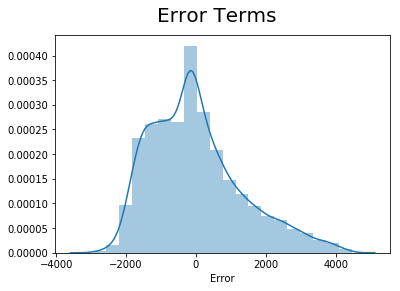

In [51]:
fig = plt.figure()
sns.distplot((train_y-y_train_sales),bins=20)
plt.xlabel('Error')
fig.suptitle('Error Terms',fontsize=20)
fig.show()

In [52]:
sales_test = pd.read_csv('test_sales.csv')

In [53]:
sales_test.shape

(5681, 11)

In [54]:
round(100*sales_test.isnull().sum()/len(sales_test),2)

Item_Identifier               0.00
Item_Weight                  17.18
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.27
Outlet_Location_Type          0.00
Outlet_Type                   0.00
dtype: float64

C:\Users\sumasark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


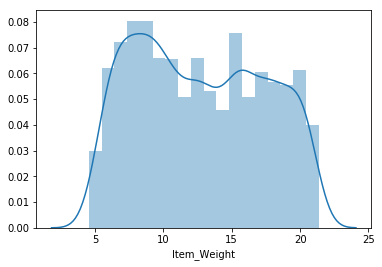

In [55]:
sns.distplot(sales_test[~sales_test.Item_Weight.isnull()].Item_Weight)

In [56]:
sales_test.loc[sales_test.Item_Weight.isnull(),'Item_Weight'] = sales_test.Item_Weight.median()
sales_test.loc[sales_test.Outlet_Size.isnull(),'Outlet_Size'] = 'Medium'

In [57]:
sales_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [58]:
sales_test.describe([0.25,0.50,0.75,0.99])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.662023,0.065684,141.023273,1997.828903
std,4.245831,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
99%,20.850000,0.236821,261.827800,2009.000000
max,21.350000,0.323637,266.588400,2009.000000


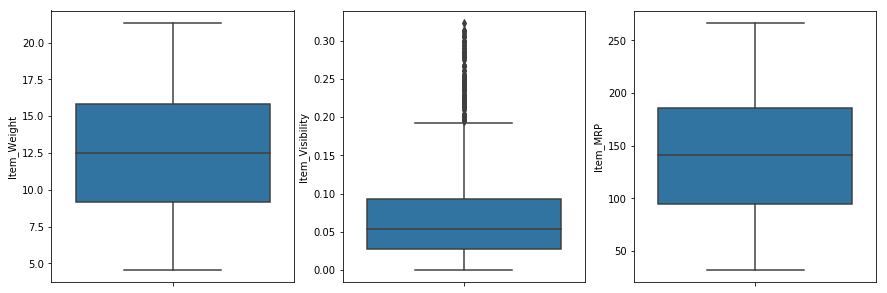

In [59]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.boxplot(y = sales_test.Item_Weight)

plt.subplot(1,4,2)
sns.boxplot(y = sales_test.Item_Visibility)

plt.subplot(1,4,3)
sns.boxplot(y = sales_test.Item_MRP)


In [60]:
Q1_vis = sales_test.Item_Visibility.quantile(0.25)
Q3_vis = sales_test.Item_Visibility.quantile(0.75)
diff_vis = Q3_vis-Q1_vis

sales_test = sales_test[(sales_test.Item_Visibility>=Q1_vis-1.5*diff_vis) & (sales_test.Item_Visibility<=Q3_vis+1.5*diff_vis)]

In [61]:
sales_test = sales_test.drop('Item_Identifier',axis='columns')

In [62]:
sales_test.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [63]:
ohe_col = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
ohe_dummy = pd.get_dummies(sales_test[ohe_col],drop_first=True)

In [64]:
sales_test = pd.concat([sales_test,ohe_dummy],axis=1)

In [65]:
sales_test = sales_test.drop(ohe_col,axis='columns')

In [66]:
scale_col = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
sales_test[scale_col] = scale.transform(sales_test[scale_col])

In [67]:
sales_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,...,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000
mean,0.482864,0.315646,0.466370,0.539841,0.599677,0.339440,0.011674,0.013290,0.028736,0.013470,...,0.111171,0.111351,0.111351,0.612608,0.275862,0.333333,0.390805,0.667565,0.110991,0.112069
std,0.253899,0.227494,0.262188,0.348223,0.490008,0.473562,0.107423,0.114525,0.167078,0.115286,...,0.314372,0.314594,0.314594,0.487198,0.446988,0.471447,0.487975,0.471128,0.314150,0.315480
min,0.000000,0.000000,0.002971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.276273,0.135854,0.268439,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.473057,0.267927,0.467993,0.583333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.672522,0.458906,0.657086,0.791667,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,0.980204,0.998727,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
test_col = X_train_new8.columns[X_train_new8.columns!='const']
sales_test = sales_test[test_col]

In [69]:
sales_test_new = sm.add_constant(sales_test)

In [70]:
y_pred = lm8.predict(sales_test_new)

In [71]:
y_pred.sample(10)

5525    2217.100205
29      2356.620225
3582    3174.872101
1040    3174.872101
3893     341.404267
1202    2185.098750
4788    3174.872101
3969    2219.794569
3642    2217.100205
1531     337.534144
dtype: float64